# Multi Layer Perceptron Project

<a href="https://colab.research.google.com/github/ErfanRasti/DataMining-Projects/blob/main/MultiLayerPerceptronProject/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

To follow the project, you can use the following links:
https://github.com/ErfanRasti/DataMining-Projects

## Importing the libraries


In [ ]:
# ! pip install dython

In [518]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.ensemble import RandomForestClassifier
from keras import layers
from tensorflow import keras
import pathlib
import os
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix

MODELS_DIR = pathlib.Path("./models")


## Functions

In [519]:
def plot_history(history):
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 1, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(history.history['auc'], label='Training AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.title('AUC')
    plt.legend()
    plt.grid()

    plt.show()


def evaluate_model(model, X_test, y_test):
    """
    Prints the accuracy, precision, recall and f1 score.
    Plot the confusion matrix.
    """
    y_pred = np.heaviside(model.predict(X_test)-0.5, 1)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    fig = plt.figure(figsize=(8, 8))
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
                fmt="d", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## Importing the dataset


In [520]:
data = pd.read_csv('./data/breast_cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing the dataset


### Cleaning the data


In this section, we will clean the data. We will remove the rows that have missing values. We will also remove the columns that have more than 50% missing values.


First we find the number of missing values in each column. Then we remove the specified columns and rows.


In [521]:
data.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [522]:
data.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [523]:
data.shape


(569, 33)

In [524]:
data.dropna(axis=1, inplace=True)


In [525]:
data.shape


(569, 32)

### Encoding categorical data


In this section, we will encode the categorical data. The only feature that is categorical is the `diagnosis` feature. We use this feature as the target variable. We will replace the `B` and `M` values with `0` and `1` respectively.

In [526]:
data.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)


### Splitting the dataset into the Training set and Test set


In this section we will split the dataset into the training set and test set. We will use the `train_test_split` function from the `sklearn.model_selection` module. We will use 20% of the data for the test set and 80% for the training set. We will also use the `random_state` parameter to ensure that the results are reproducible.

In [527]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


In [528]:
train_data.shape, test_data.shape


((455, 32), (114, 32))

### Plotting the histogram of the training data


First of all we should remove the `id` column because it is not useful for our analysis. Then we plot the histogram of the training data. We can see that the features have different ranges.

In [529]:
train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)


**TODO**


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

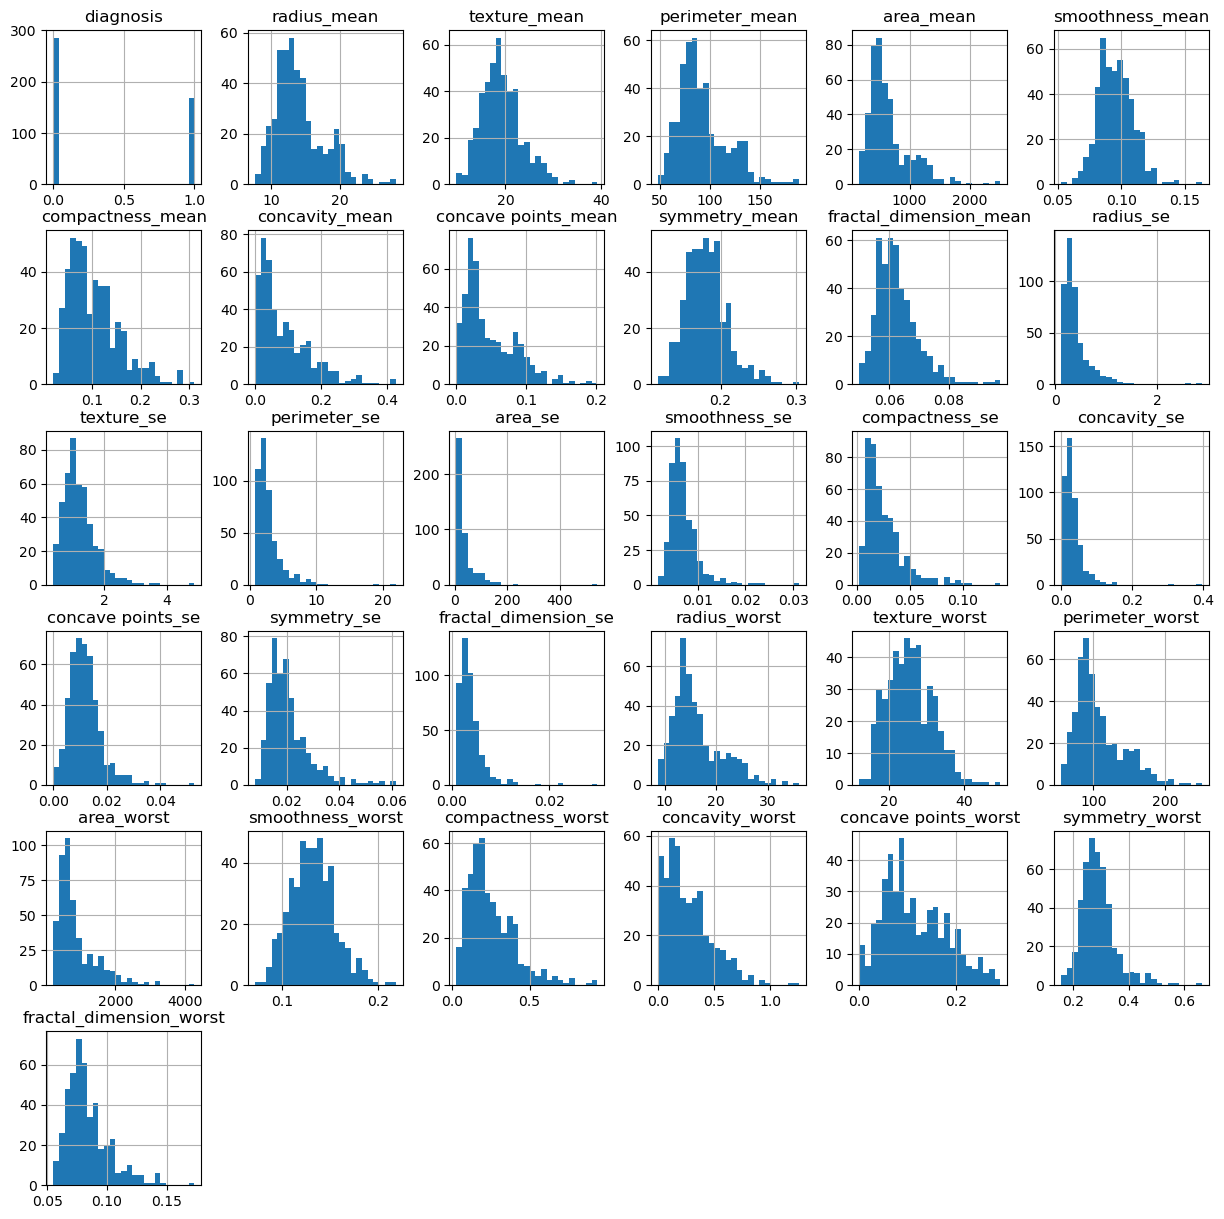

In [530]:
train_data.hist(bins=25, figsize=(15, 15))


### Calculating the correlation matrix


In this section we will calculate the correlation matrix. We will use the `corr` method of the `DataFrame` class. We will also plot the correlation matrix using the `associations` function of the `dython` module. <br>
Now, we will remove the features that have a correlation coefficient lower than 0.1 with the target variable.

<Figure size 800x800 with 0 Axes>

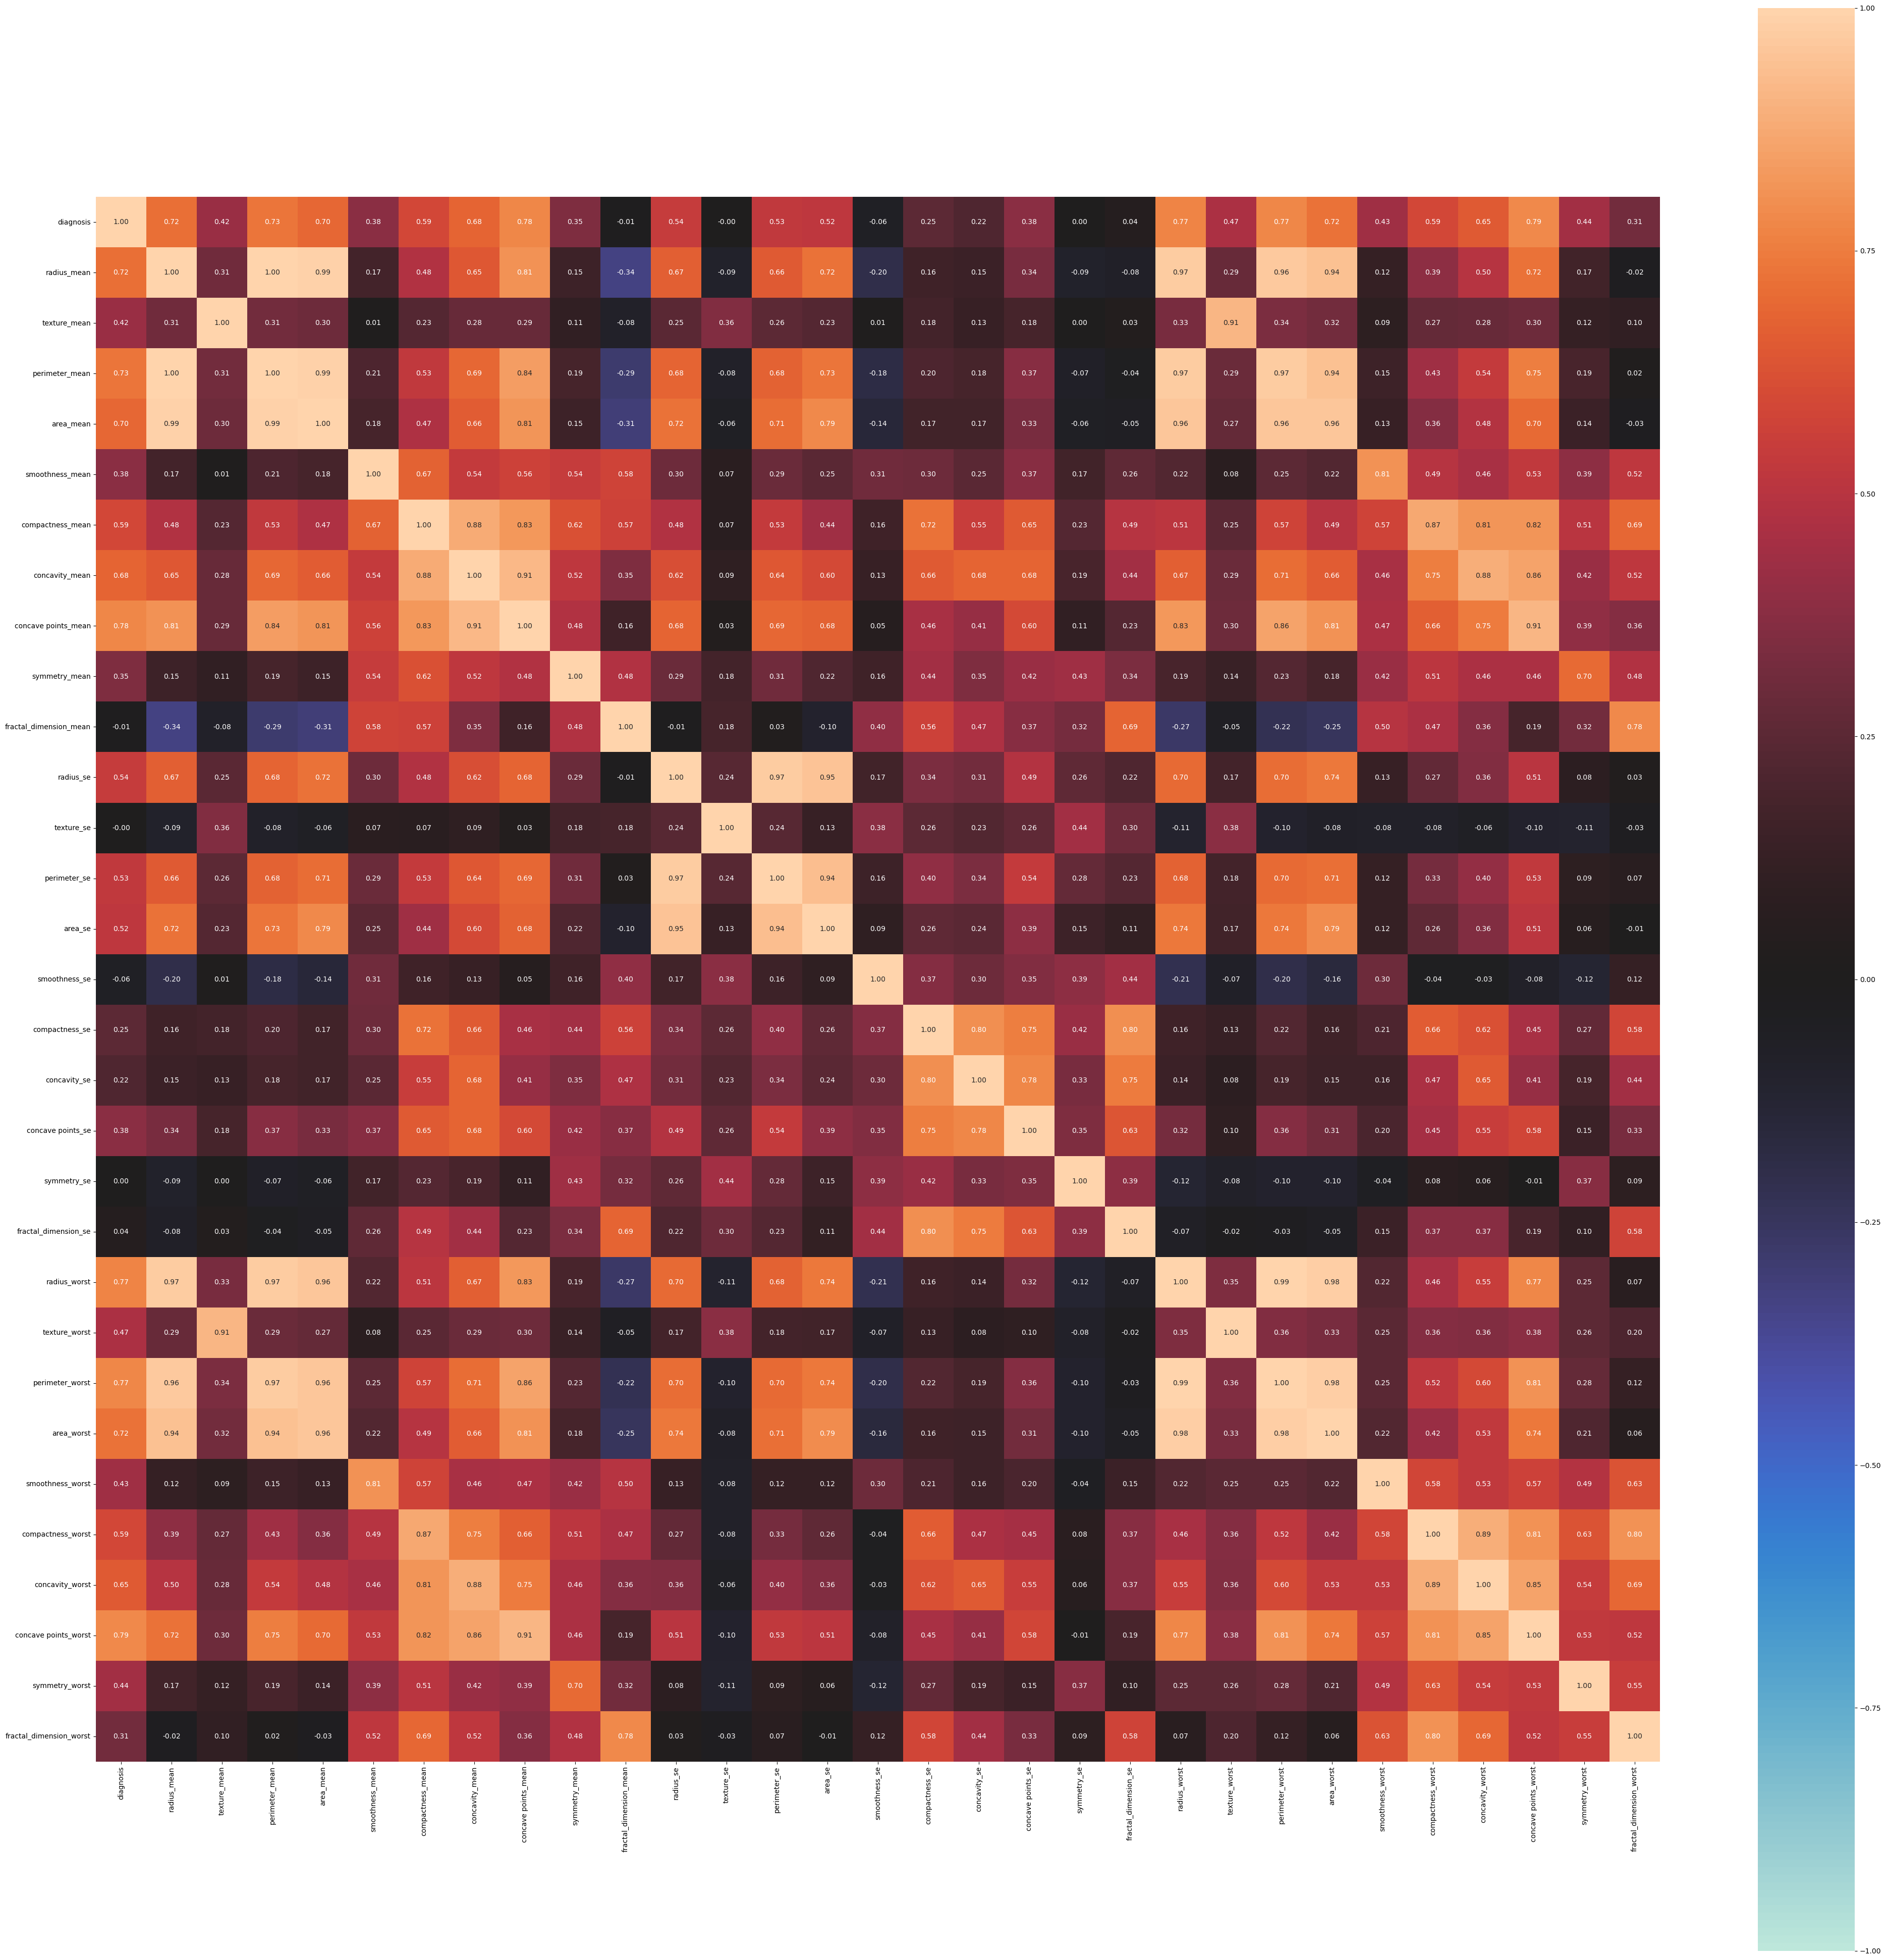

In [531]:
plt.figure(figsize=(8, 8))
corr_mat_complete = associations(
    train_data,
    filename='./images/complete_correlation.png',
    figsize=(50, 50))


1. We calculate the correlation matrix.
2. We calculate the absolute value of the correlation coefficients.
3. We sort the correlation coefficients in descending order.
4. We find the features that have a correlation coefficient lower than 0.1 with the target variable.

In [532]:
corr_mat = train_data.corr()
corr_mat_abs = corr_mat.abs()

sorted_corr_mat_abs = corr_mat_abs.sort_values(by=['diagnosis'], ascending=False)
sorted_corr_mat_abs['diagnosis']


diagnosis                  1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

In [533]:
mask = corr_mat_abs['diagnosis'] <= 0.1
less_corr_feat = corr_mat_abs[mask]['diagnosis'].index
less_corr_feat


Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

### Seperating the features and the labels


In this section we want to seperate the features and the labels. We save the label column in the `y` variable and the rest of the columns in the `X` variable. We do this seperatly for the training set and the test set.

In [534]:
X_train = train_data.drop(['diagnosis'], axis=1)
X_test = test_data.drop(['diagnosis'], axis=1)

y_train = train_data['diagnosis']
y_test = test_data['diagnosis']


### Feature selection using random forest


Now, we test another feature selection method. We use the `RandomForestClassifier` class from the `sklearn.ensemble` module. We use the `feature_importances_` attribute to find the importance of each feature. After that, we plot the importance of each feature using `matplotlib.pyplot.barh` function.

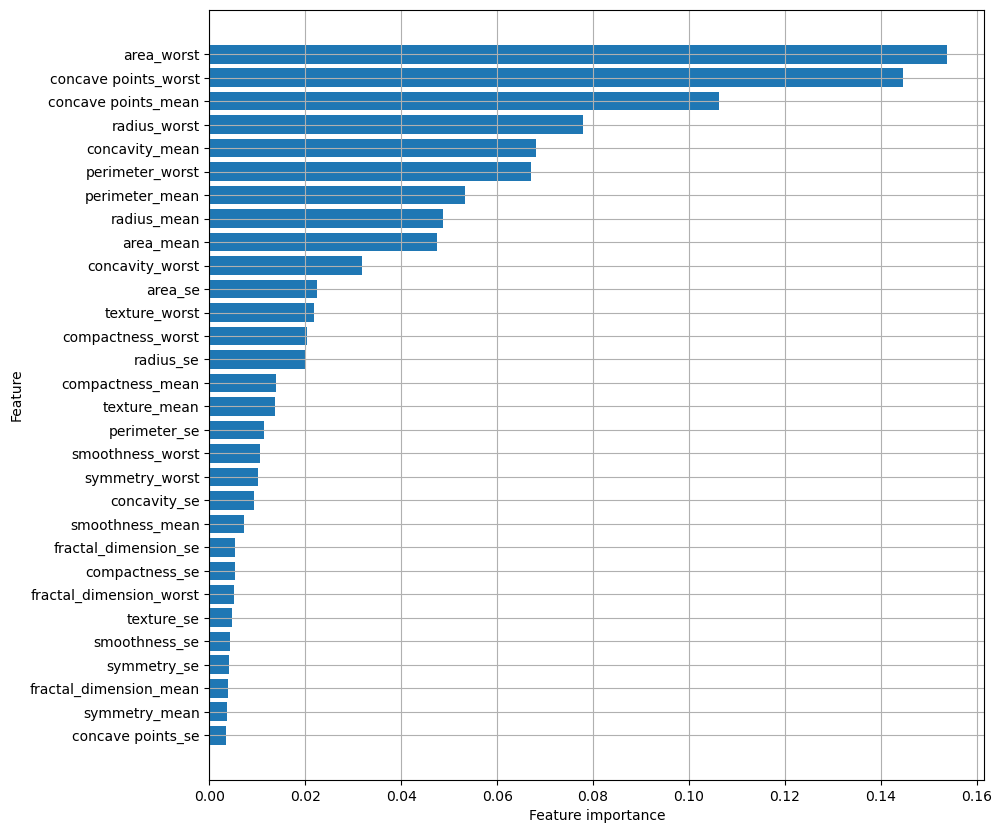

In [535]:
rnd_frst_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_frst_clf.fit(X_train, y_train)

feat_ind = list(zip(X_train.columns,
                    rnd_frst_clf.feature_importances_))
feat_ind.sort(key=lambda x: x[1])
fig = plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in feat_ind], [x[1] for x in feat_ind])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


We can see that the most of the features has a low importance. So, we can not confine this method. So we use the previous method.

In [536]:
X_train.drop(less_corr_feat, axis=1, inplace=True)
X_test.drop(less_corr_feat, axis=1, inplace=True)


In [537]:
X_train.dtypes


radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
radius_se                  float64
perimeter_se               float64
area_se                    float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

### Normalizing the data


First, we use standard scaler to detect the outliers.


In [538]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std


### Plotting the box plot of the features


We plot the box plot of the features to find the outliers. We can see that lots of the features have outliers. We should remove the outliers from the dataset.

<Axes: >

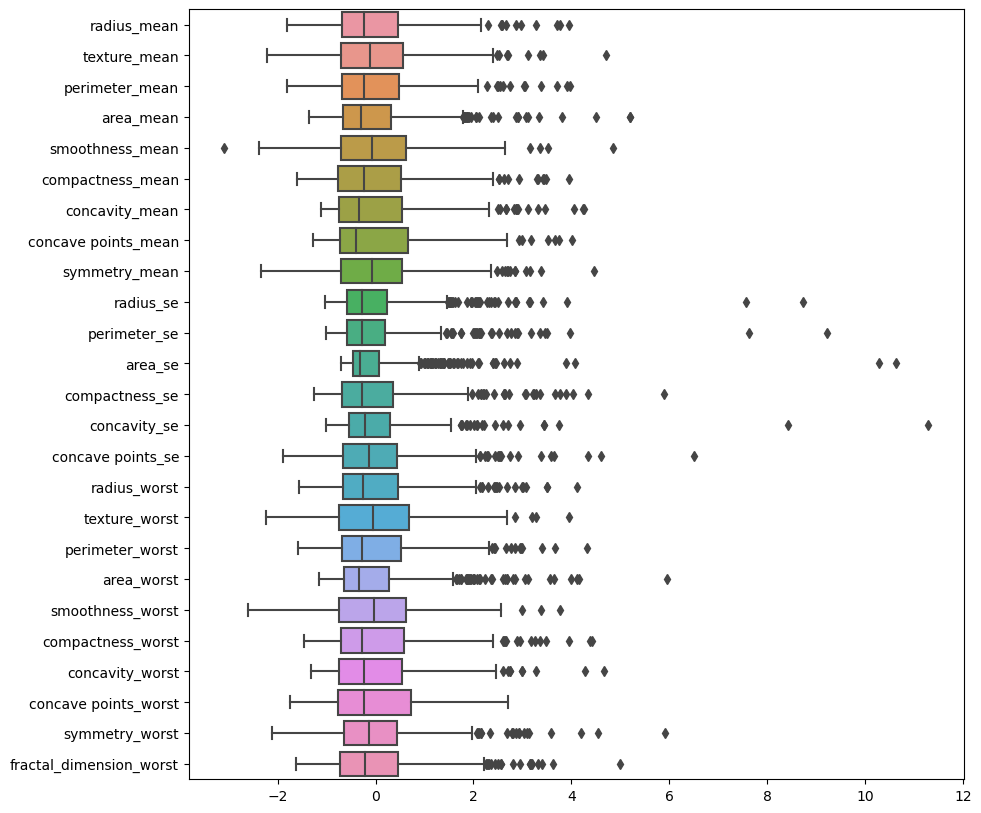

In [539]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


Also, we can use the `describe` method of the `DataFrame` class to find the outliers. We can see that there is a major gap between 75% quantile and the maximum value of the features. So, we can remove the outliers using this method.

In [540]:
X_train_scaled.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,455.000000,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.045183e-16,-3.513673e-17,-1.288347e-16,3.904081e-16,-2.498612e-16,-5.660917e-17,-5.075305e-17,2.127724e-16,1.366428e-16,8.588978e-17,...,-7.808162e-17,-6.715019e-16,0.000000,1.815398e-16,1.171224e-17,-2.283887e-16,-6.344132e-17,-8.784182e-17,4.997224e-16,9.760202e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.817582e+00,-2.221056e+00,-1.807507e+00,-1.363535e+00,-3.096603e+00,-1.605461e+00,-1.118668e+00,-1.268513e+00,-2.342852e+00,-1.025974e+00,...,-1.570710e+00,-2.228434e+00,-1.576439,-1.150992e+00,-2.615060e+00,-1.454394e+00,-1.311352e+00,-1.747881e+00,-2.121925e+00,-1.615195e+00
25%,-6.823420e-01,-7.067580e-01,-6.900018e-01,-6.594790e-01,-7.124195e-01,-7.762328e-01,-7.497135e-01,-7.340968e-01,-7.002753e-01,-5.905329e-01,...,-6.609700e-01,-7.404142e-01,-0.684595,-6.351141e-01,-7.422129e-01,-6.953669e-01,-7.547565e-01,-7.692520e-01,-6.492700e-01,-7.181711e-01
50%,-2.312437e-01,-1.183855e-01,-2.426706e-01,-2.892789e-01,-8.073127e-02,-2.410749e-01,-3.442667e-01,-3.906934e-01,-6.907484e-02,-2.765771e-01,...,-2.629460e-01,-5.205056e-02,-0.282643,-3.353816e-01,-2.738576e-02,-2.750830e-01,-2.301576e-01,-2.383768e-01,-1.235478e-01,-2.133498e-01
75%,4.588376e-01,5.625796e-01,4.879428e-01,3.189874e-01,6.324768e-01,5.275475e-01,5.467851e-01,6.730161e-01,5.348403e-01,2.321443e-01,...,4.520424e-01,6.849519e-01,0.525754,2.721866e-01,6.289555e-01,5.732259e-01,5.377577e-01,7.182089e-01,4.314691e-01,4.595585e-01
max,3.957324e+00,4.710489e+00,3.972439e+00,5.202586e+00,4.859294e+00,3.959953e+00,4.252055e+00,4.017849e+00,4.471203e+00,8.726432e+00,...,4.116358e+00,3.957771e+00,4.317553,5.948872e+00,3.763364e+00,4.419968e+00,4.667690e+00,2.706695e+00,5.911172e+00,4.993986e+00


### Deleting the outliers


In this part we remove the outliers from the dataset. We remove the samples which has a value higher than 3 times the standard deviation of the feature.
After removing the samples, we should reset the index of the dataset. because the indices of the samples are not consecutive.

In [541]:
outliers = abs(X_train_scaled) > 3
outliers = outliers.sum(axis=1)
outliers = outliers[outliers > 0]

X_train_scaled.drop(outliers.index, inplace=True)
y_train.drop(outliers.index, inplace=True)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


### Plotting the box plot of the features after deleting the outliers


<Axes: >

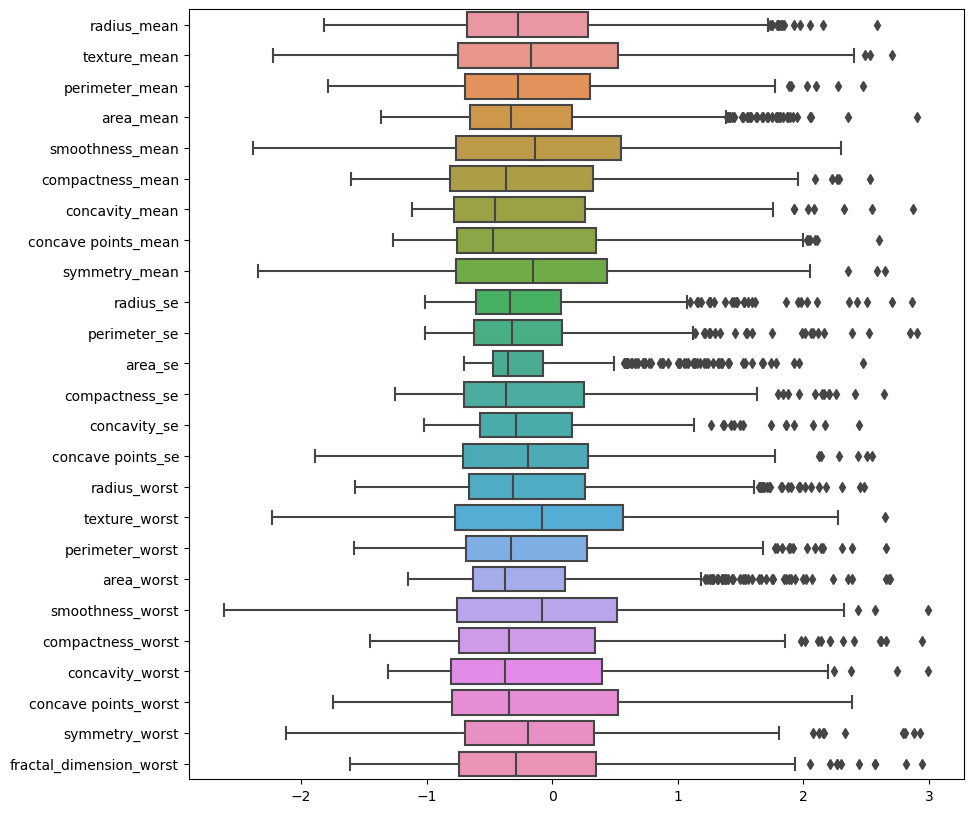

In [542]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


In [543]:
X_train_scaled.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.090285,-0.075280,-0.099546,-0.106103,-0.094438,-0.175064,-0.184969,-0.155022,-0.142169,-0.149122,...,-0.102832,-0.066045,-0.111540,-0.117102,-0.067695,-0.140131,-0.151156,-0.137839,-0.116500,-0.123946
std,0.863878,0.931593,0.856427,0.807428,0.907392,0.812573,0.781383,0.835254,0.853735,0.693021,...,0.859266,0.947015,0.849229,0.793912,0.947343,0.838835,0.843854,0.895571,0.815196,0.838591
min,-1.817582,-2.221056,-1.790239,-1.363535,-2.386986,-1.605461,-1.118668,-1.268513,-2.342852,-1.015733,...,-1.570710,-2.228434,-1.576439,-1.150992,-2.615060,-1.454394,-1.311352,-1.747881,-2.121925,-1.615195
25%,-0.681635,-0.753640,-0.693188,-0.659479,-0.763773,-0.814683,-0.780512,-0.762998,-0.763941,-0.604836,...,-0.664088,-0.777512,-0.690887,-0.635422,-0.759542,-0.740363,-0.804423,-0.802508,-0.697567,-0.743664
50%,-0.269424,-0.167612,-0.276179,-0.330412,-0.137113,-0.365621,-0.455003,-0.468859,-0.156388,-0.335554,...,-0.316986,-0.082553,-0.330134,-0.377836,-0.081539,-0.347012,-0.379395,-0.348746,-0.197181,-0.292351
75%,0.284196,0.521558,0.296141,0.159244,0.544493,0.323623,0.257045,0.345706,0.432975,0.071635,...,0.256668,0.562118,0.275565,0.101225,0.515233,0.341796,0.399385,0.519973,0.329333,0.351002
max,2.588474,2.703928,2.475853,2.906444,2.302375,2.530578,2.875399,2.604299,2.652181,2.867572,...,2.484771,2.650292,2.660607,2.688191,2.992217,2.943330,2.995755,2.386761,2.926274,2.943324


In [544]:
X_train_scaled.shape, y_train.shape


((404, 25), (404,))

### Normalizing the data with min-max scaler


We use min-max scaler to use the relu activation function.


In [545]:
X_train_scaled_min = X_train_scaled.min()
X_train_scaled_max = X_train_scaled.max()

X_train_scaled = (X_train_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)
X_test_scaled = (X_test_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_scaled = X_train_scaled.to_numpy()
y_train = y_train.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()
y_test = y_test.to_numpy()


In [546]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape


((404, 25), (404,), (114, 25), (114,))

## Training the model


In this section we should build the model. We use the `Sequential` class from the `keras.models` module. We use the `add` method to add the layers to the model. We use the `Dense` class from the `keras.layers` module to add the layers to the model. We use the `relu` activation function for the hidden layers and the `sigmoid` activation function for the output layer. We use the `binary_crossentropy` loss function and the `adam` optimizer. We use the `accuracy` and `AUC` metrices to evaluate the model.

Some of the rules of thumb for choosing the number of neurons in the hidden layers are:
1. We usually increase the number of neurons in the hidden layers from the input layer to the output layer.
2. We use the batch normalization to make the model generalize better.
3. We use the activation function after the batch normalization to maximize the effect of the activation function.
4. We use the dropout to prevent overfitting. We use multiple dropout layers with different dropout rates. as the depth of the network increases, we increase the dropout rate(because the number of the extracted features increases).
5. We define the model as a function to be able to reset the states of the layers. before each learning process.

In [547]:
def get_model():
    inputs = keras.Input(shape=(X_train_scaled.shape[1],))
    x = layers.Dense(32, activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dense(64, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dropout(0.1)(x)

    x = layers.Dense(128, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dense(256, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dropout(0.5)(x)

    x = layers.Dense(1, activation='sigmoid')(x)
    outputs = x
    model = keras.Model(inputs=inputs, outputs=outputs,
                        name='breast_cancer_model')

    return model


model = get_model()
model.summary()


Model: "breast_cancer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_115 (Dense)           (None, 32)                832       
                                                                 
 batch_normalization_92 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_92 (Activation)  (None, 32)                0         
                                                                 
 dense_116 (Dense)           (None, 64)                2112      
                                                                 
 batch_normalization_93 (Bat  (None, 64)               256       
 chNormalization)                              

#### Training the model with learning_rate=0.01, epochs=50

In this section we train the model with learning_rate=0.01, epochs=50.
1. We use ADAM optimizer with learning_rate=0.01.
2. We use `binary_crossentropy` loss function for the binary classification problem.
3. We use `accuracy` and `AUC` metrices to evaluate the model.
4. We use `ModelCheckpoint` callback to save the best model. We monitor the best model according to the `val_loss` metric.
5. We use `epochs=50` to train the model for 50 epochs.
6. We use `batch_size=16` to update the weights in small batches.
7. We use `validation_split=0.2` to use 20% of the training data for the validation set.
8. We use `shuffle=True` to shuffle the training data before each epoch.


In [548]:
model = get_model()

model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch50_lr01.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/50


/home/erfan/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 1s 24ms/step - loss: 0.2322 - accuracy: 0.8916 - auc: 0.9619 - val_loss: 2.2011 - val_accuracy: 0.3086 - val_auc: 0.9811
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2458 - accuracy: 0.9226 - auc: 0.9627 - val_loss: 2.4891 - val_accuracy: 0.3086 - val_auc: 0.9139
Epoch 3/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1620 - accuracy: 0.9381 - auc: 0.9827 - val_loss: 1.5956 - val_accuracy: 0.4074 - val_auc: 0.9671
Epoch 4/50
21/21 [==============================] - 0s 14ms/step - loss: 0.1255 - accuracy: 0.9598 - auc: 0.9890 - val_loss: 1.0044 - val_accuracy: 0.5679 - val_auc: 0.9904
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.2478 - accuracy: 0.9009 - auc: 0.9648 - val_loss: 0.4624 - val_accuracy: 0.7037 - val_auc: 0.9925
Epoch 6/50
21/21 [==============================] - 0s 14ms/step - loss: 0.1497 - accuracy: 0.9505 - auc: 0.9854 - val_loss: 0.4187 - val_accuracy

After training the model, we load the best model and evaluate it on the test set. We wrote a function above to plot the loss, accuracy and AUC for training and validation sets in different epochs.
1. We can see that the convergance of the model is great and the model does not overfit.
2. We can see that the accuracy of the model is 0.98 and the AUC is 0.99 on both training and validation sets.
3. We can see that the loss of the model is decreasing during the training process.
4. The major fraction of the plots are caused by the dropout layers. Because the dropout layers are not active during the evaluation process.

4/4 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9649 - auc: 0.9920


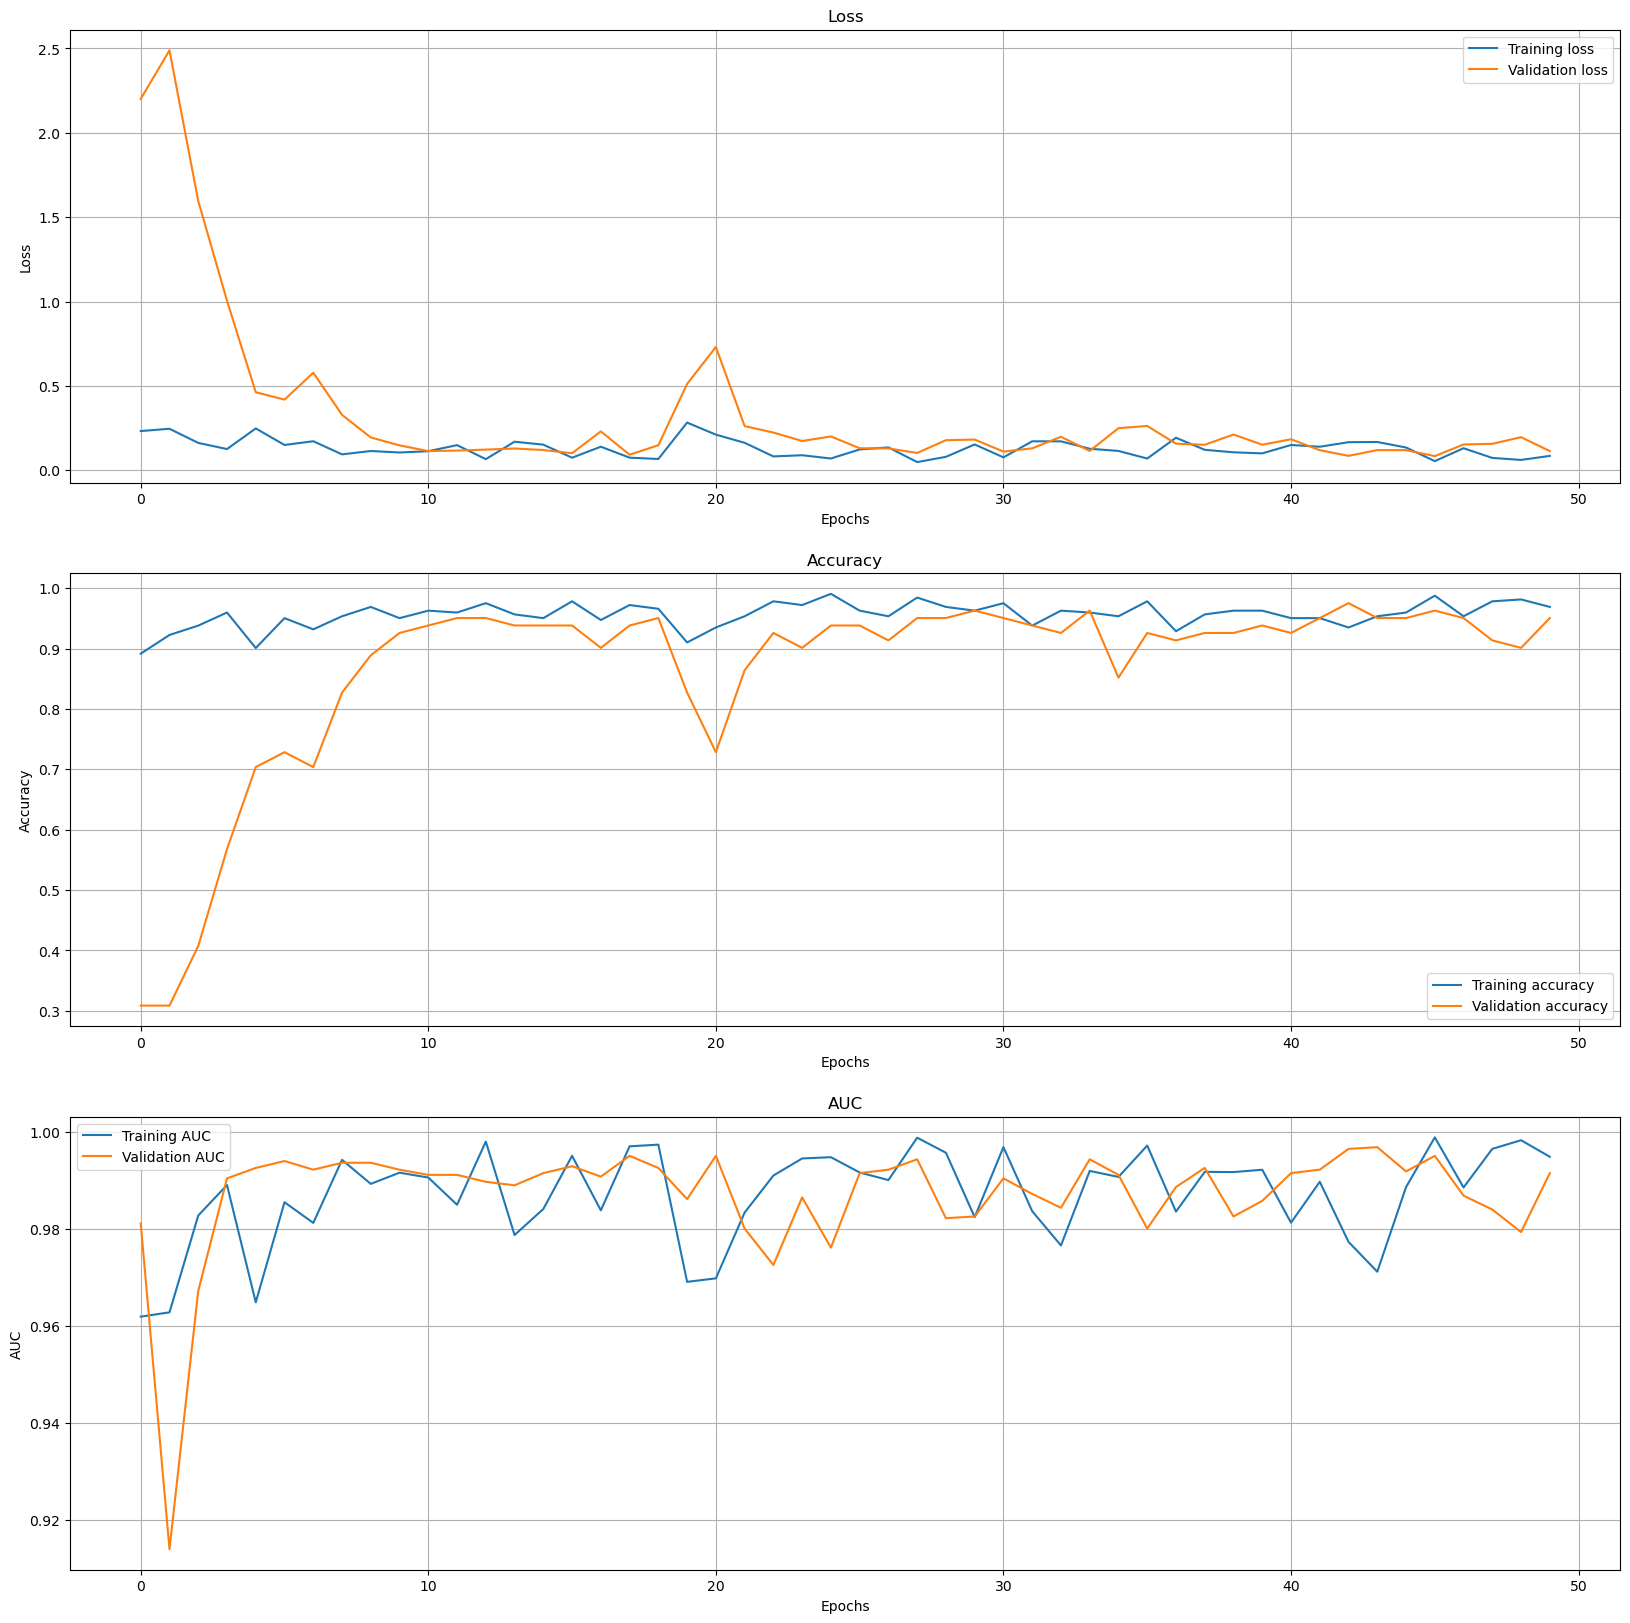

In [549]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr01.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.01, epochs=100

This section is very similar to the previous section. The only difference is that we train the model for 100 epochs.
1. We can see that the model converges after 50 epochs. So, we can not improve the model by increasing the number of epochs.
2. We can see that the model does not overfit.
3. The accuracy of the model is a little bit higher than the previous model which is due to the higher number of epochs.

In [550]:
model = get_model()

model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch100_lr01.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=100,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/100
21/21 [==============================] - 1s 23ms/step - loss: 0.4205 - accuracy: 0.8483 - auc: 0.9111 - val_loss: 1.3133 - val_accuracy: 0.3086 - val_auc: 0.9900
Epoch 2/100
21/21 [==============================] - 0s 12ms/step - loss: 0.2067 - accuracy: 0.9133 - auc: 0.9676 - val_loss: 1.6333 - val_accuracy: 0.3580 - val_auc: 0.9746
Epoch 3/100
21/21 [==============================] - 0s 13ms/step - loss: 0.1258 - accuracy: 0.9505 - auc: 0.9903 - val_loss: 0.9574 - val_accuracy: 0.5185 - val_auc: 0.9929
Epoch 4/100
21/21 [==============================] - 0s 13ms/step - loss: 0.1169 - accuracy: 0.9536 - auc: 0.9910 - val_loss: 0.6274 - val_accuracy: 0.6420 - val_auc: 0.9964
Epoch 5/100
21/21 [==============================] - 0s 13ms/step - loss: 0.0881 - accuracy: 0.9690 - auc: 0.9947 - val_loss: 0.5136 - val_accuracy: 0.7160 - val_auc: 0.9975
Epoch 6/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1523 - accuracy: 0.9474 - auc: 0.9826 - val_loss: 0.54

4/4 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9386 - auc: 0.9689


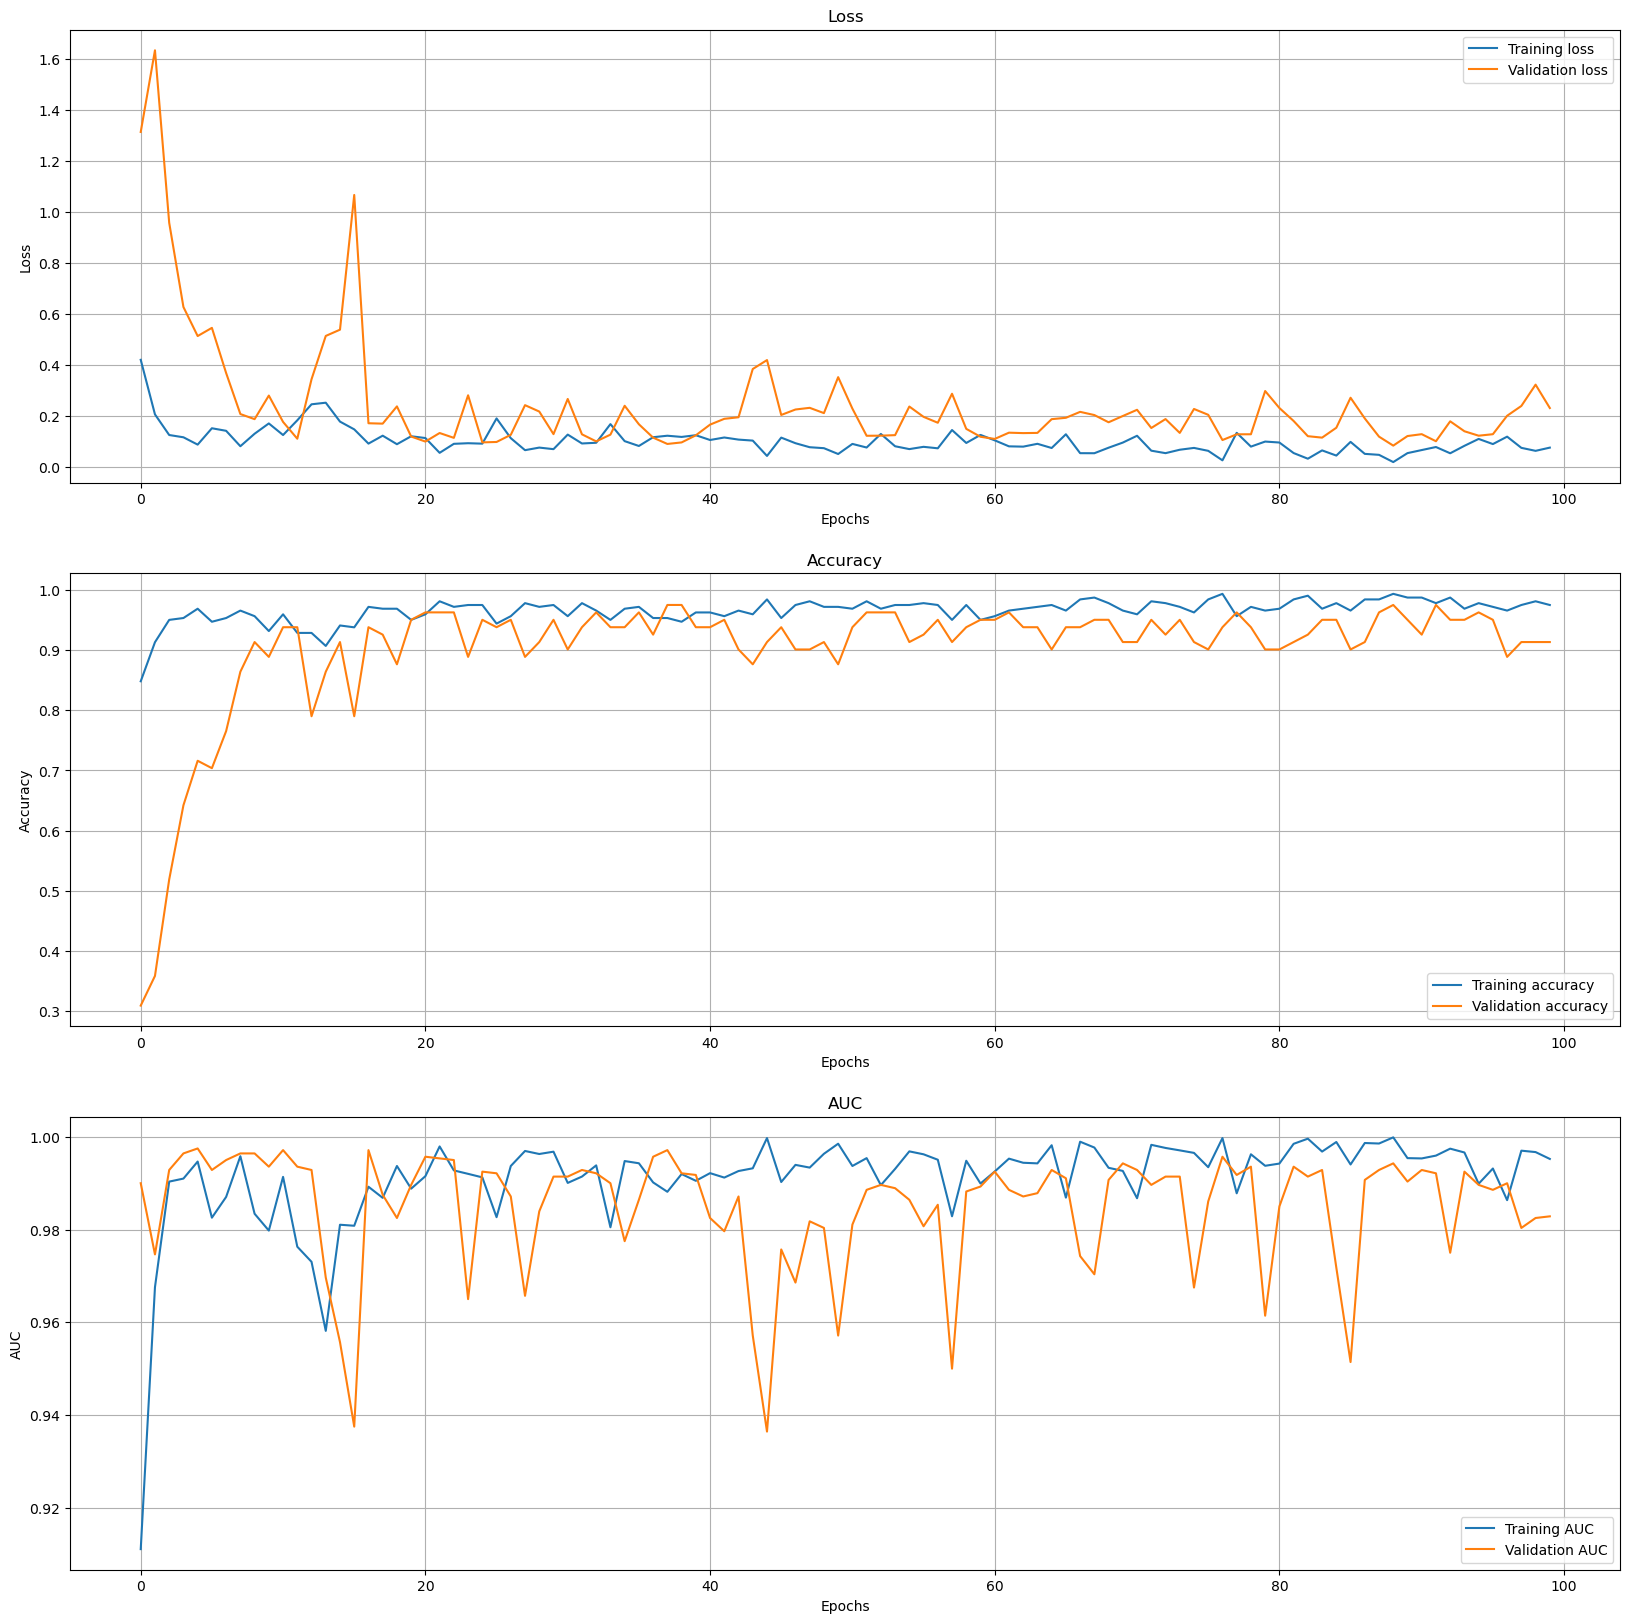

In [551]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch100_lr01.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.001, epochs=50

In this section we decrease the learning rate to 0.001 and train the model for 50 epochs.
1. We can see that the model does not converge. So, we should increase the learning rate.
2. We can see that thhe model overfits. That is because the learning rate is too small and the model can not converge. So, the learning process is disturbed.

In [552]:
model = get_model()

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch50_lr001.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/50
21/21 [==============================] - 1s 20ms/step - loss: 0.4540 - accuracy: 0.7864 - auc: 0.8625 - val_loss: 0.6454 - val_accuracy: 0.8025 - val_auc: 0.9757
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1966 - accuracy: 0.9257 - auc: 0.9714 - val_loss: 0.5846 - val_accuracy: 0.9259 - val_auc: 0.9779
Epoch 3/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1942 - accuracy: 0.9288 - auc: 0.9743 - val_loss: 0.5227 - val_accuracy: 0.8272 - val_auc: 0.9764
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.1358 - accuracy: 0.9567 - auc: 0.9852 - val_loss: 0.4630 - val_accuracy: 0.8272 - val_auc: 0.9757
Epoch 5/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1408 - accuracy: 0.9536 - auc: 0.9841 - val_loss: 0.3947 - val_accuracy: 0.8765 - val_auc: 0.9811
Epoch 6/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1250 - accuracy: 0.9443 - auc: 0.9898 - val_loss: 0.3234 - v

4/4 [==============================] - 0s 6ms/step - loss: 0.1252 - accuracy: 0.9561 - auc: 0.9897


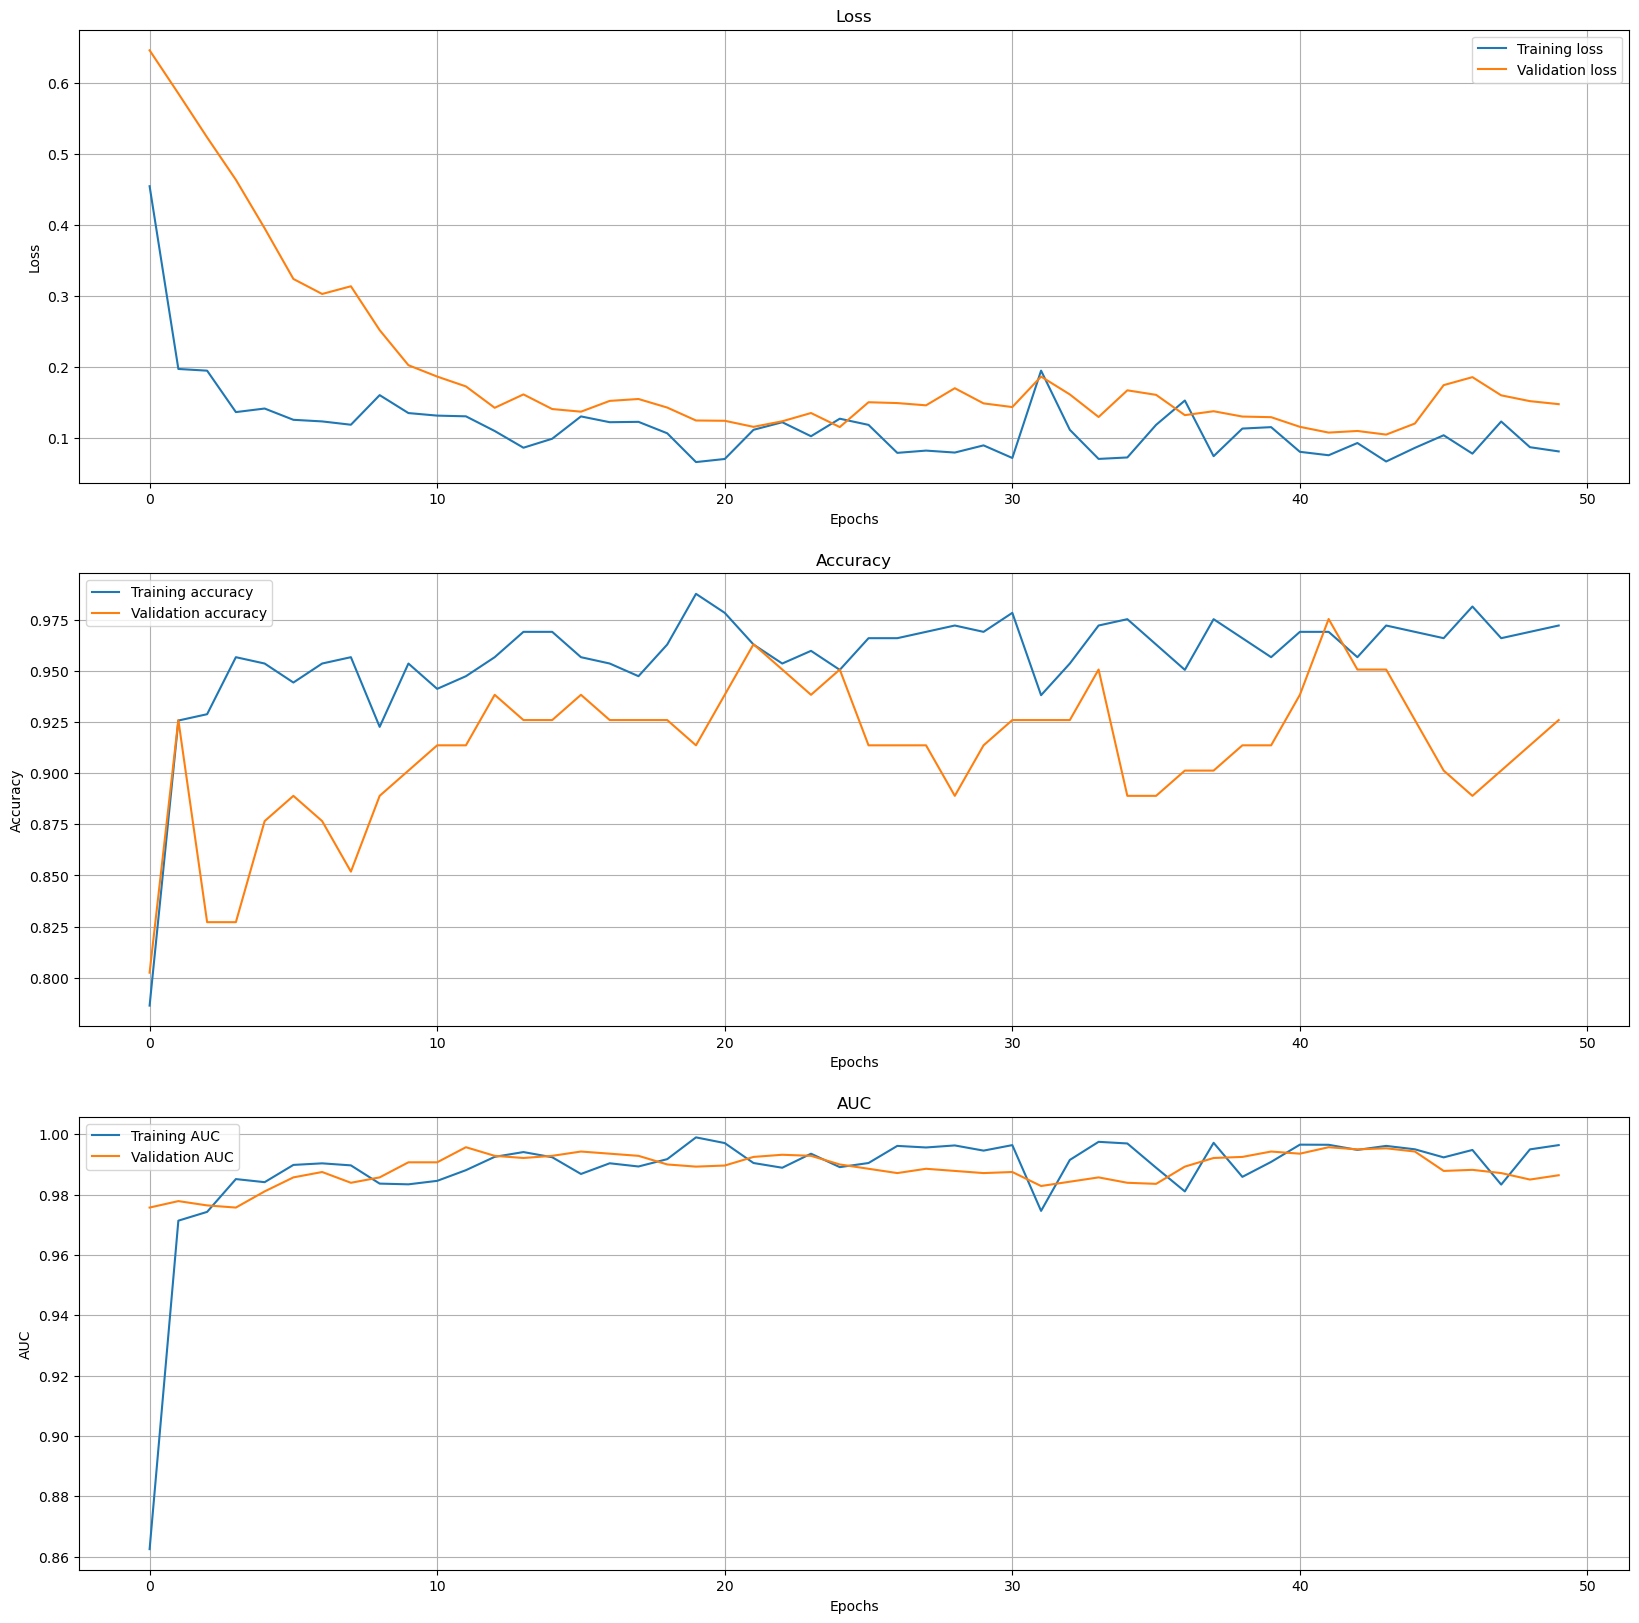

In [553]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr001.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.001, epochs=100

In this section we increase the number of epochs to 100.
1. We can see that the model is still overfitting. So, we should increase the learning rate.
2. The convergance state of the model is better than the previous model due to the higher number of epochs.
3. The best values for learning rate and number of epochs are 0.01 and 50 respectively.

In [554]:
model = get_model()

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch100_lr001.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=100,
                    batch_size=16, validation_split=0.2, shuffle=True, callbacks=callbacks)


Epoch 1/100
21/21 [==============================] - 1s 21ms/step - loss: 0.4730 - accuracy: 0.7678 - auc: 0.8694 - val_loss: 0.6314 - val_accuracy: 0.7531 - val_auc: 0.9850
Epoch 2/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1867 - accuracy: 0.9257 - auc: 0.9707 - val_loss: 0.5633 - val_accuracy: 0.9259 - val_auc: 0.9857
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1447 - accuracy: 0.9443 - auc: 0.9850 - val_loss: 0.5166 - val_accuracy: 0.9383 - val_auc: 0.9882
Epoch 4/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1318 - accuracy: 0.9567 - auc: 0.9858 - val_loss: 0.4444 - val_accuracy: 0.9259 - val_auc: 0.9854
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1480 - accuracy: 0.9567 - auc: 0.9801 - val_loss: 0.3884 - val_accuracy: 0.9506 - val_auc: 0.9868
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1602 - accuracy: 0.9350 - auc: 0.9837 - val_loss: 0.36

4/4 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.9649 - auc: 0.9954


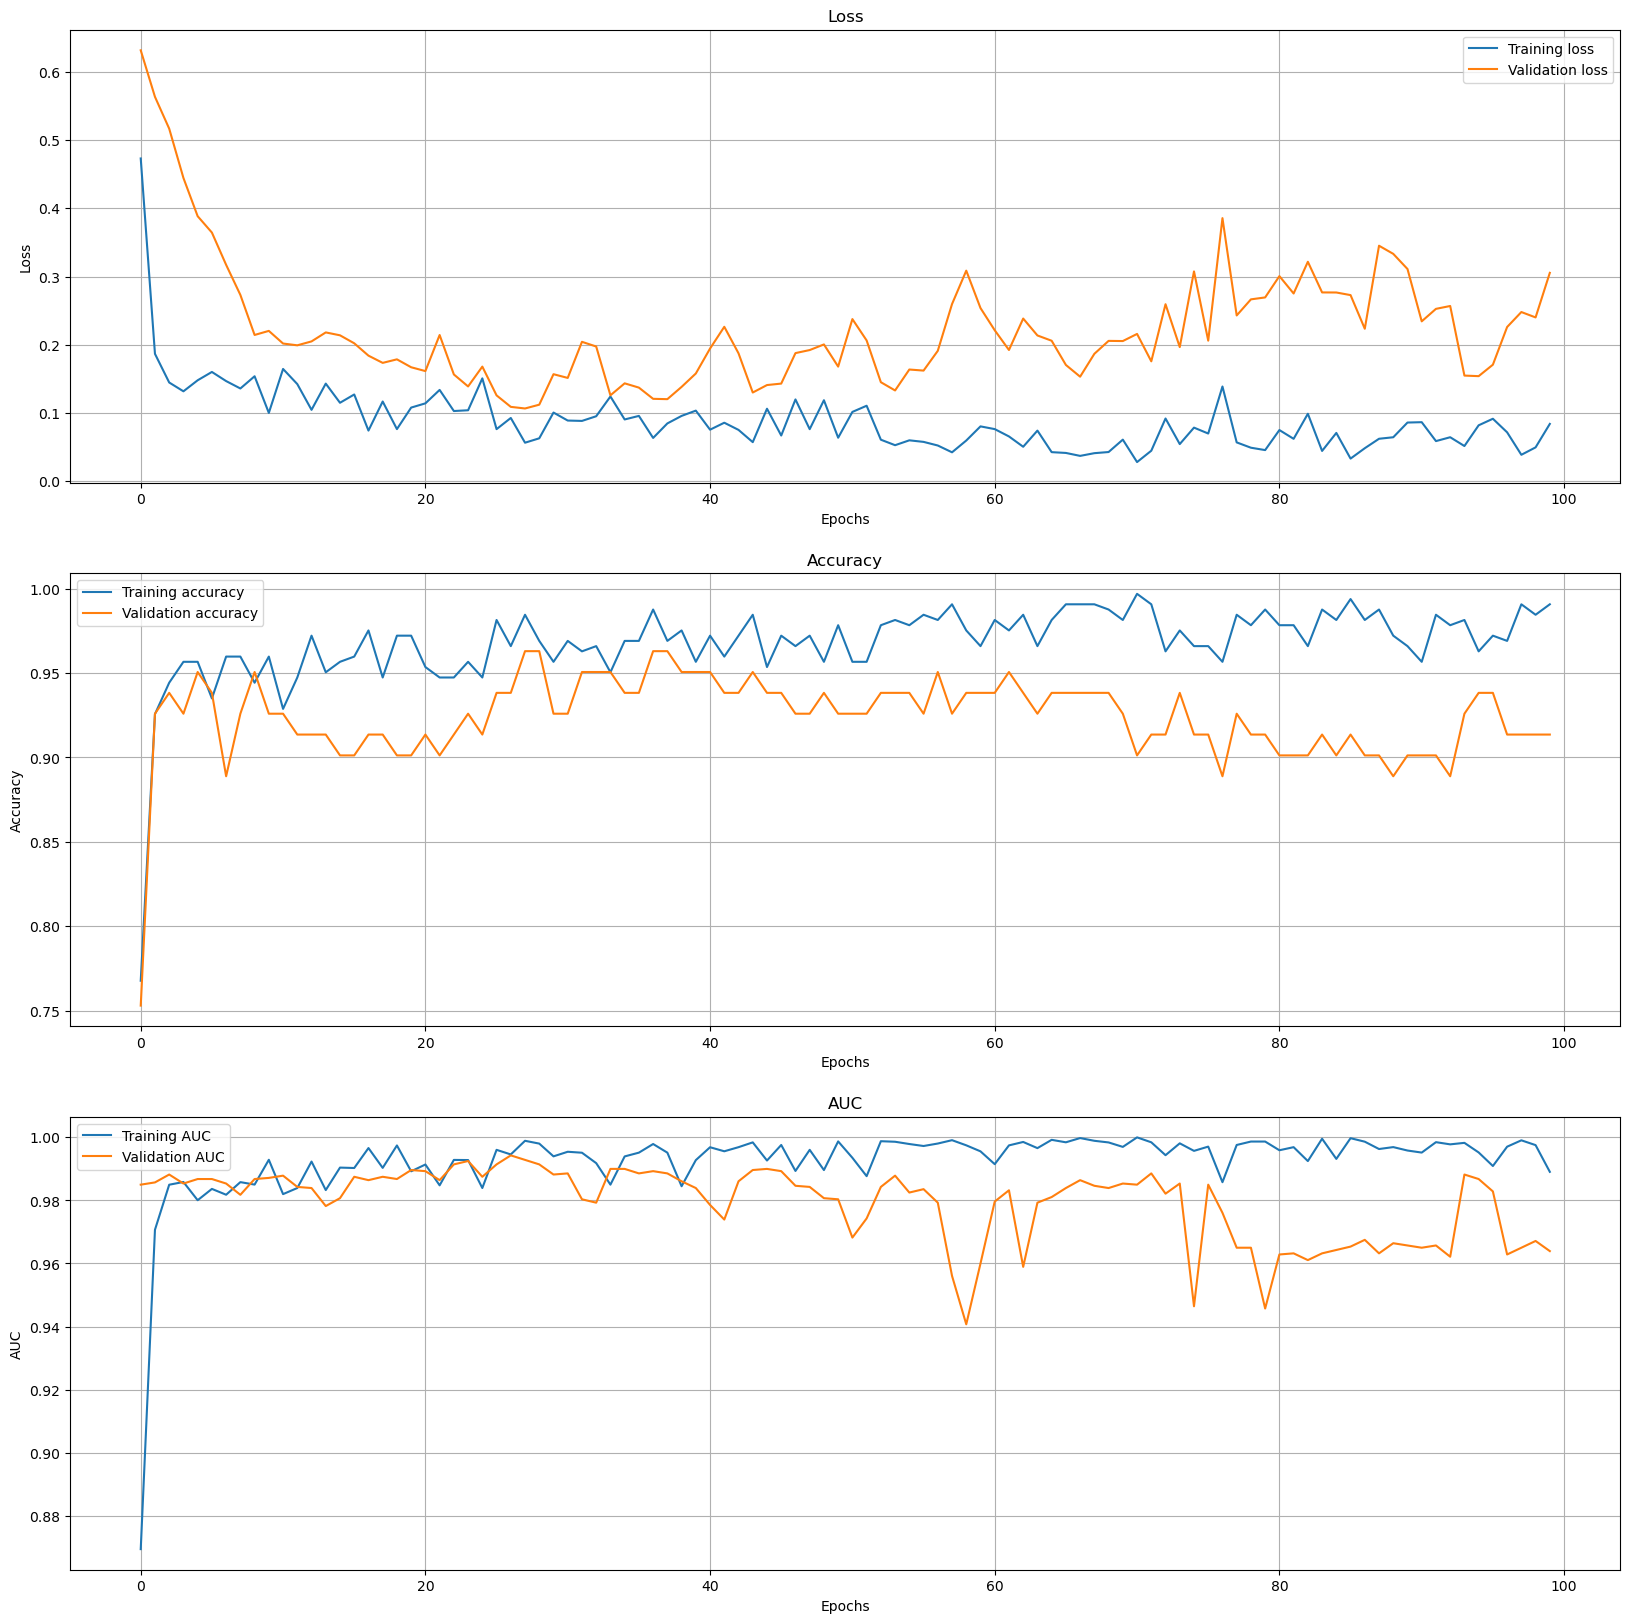

In [555]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch100_lr001.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


## Evaluating the model


We implemented a function above to calculate the accuracy, precision, recall and confusion matrix. We plot the confusion matrix using the `confusion_matrix` function of the `sklearn.metrics` module.
1. We can see that the model has a great performance on the test set.
2. The recall of the model is higher than the precision. That is because we have a class imbalance problem and the model tries to predict the positive samples correctly.
3. According to the learning problem, the recall is more important than the precision. Because we should detect all the positive samples. So, we should not miss any positive sample. We probably have some false positive samples; But, we can tolerate them.
4. The f1-score of the model is a balance between the precision and the recall. So, it is a good metric to evaluate the model.
5. According to the confusion matrix we can conclude that the malignant samples are predicted better than the benign samples. That's what we perfer. Because we should not miss any malignant sample.

4/4 [==============================] - 0s 2ms/step
Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1: 0.9534883720930233
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:


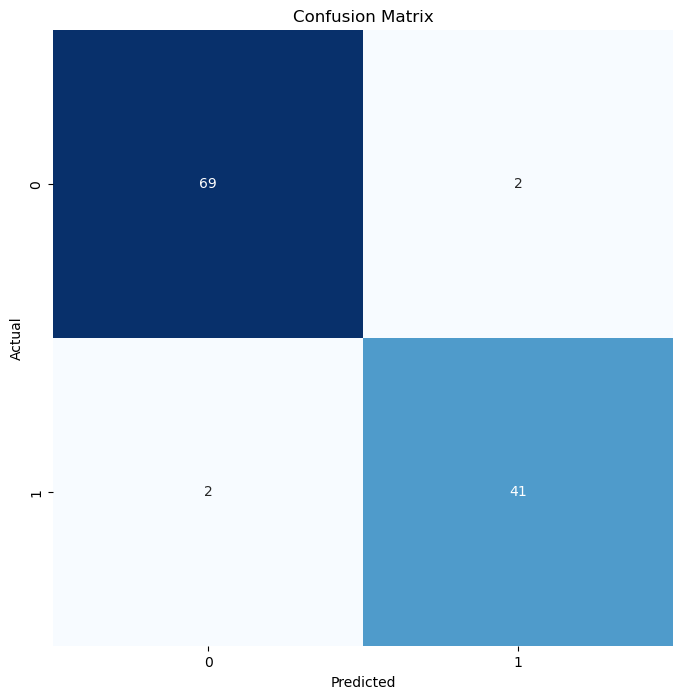

In [556]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr01.keras'))

evaluate_model(model, X_test_scaled, y_test)